# Project M17 : Happiness Score

Objective - Develop a model to predict happiness score based on provided details

Approach - Dependent variable is continous hence regression approach would be suitable

# Import libraries

In [79]:
import numpy as np
import pandas as pd

In [80]:
hs = pd.read_csv('happiness_score_dataset.csv')

# Exploratory Data Analysis & Preprocessing

In [81]:
hs.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [82]:
# Country and Rank are not extremely unique and will not let model learn proprly, hence can be droped

# Encoding Region column

In [83]:
hs.shape 

(158, 12)

In [84]:
hs.drop(['Country', 'Happiness Rank'], axis = 1, inplace = True)

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
hs['Region'] = le.fit_transform(hs['Region'])

In [87]:
hs.head(10)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,9,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,9,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,9,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [88]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    int32  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 11.9 KB


In [89]:
# There is no null value & all values are numeric

In [90]:
hs.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Visualization Analysis

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Outlier detection

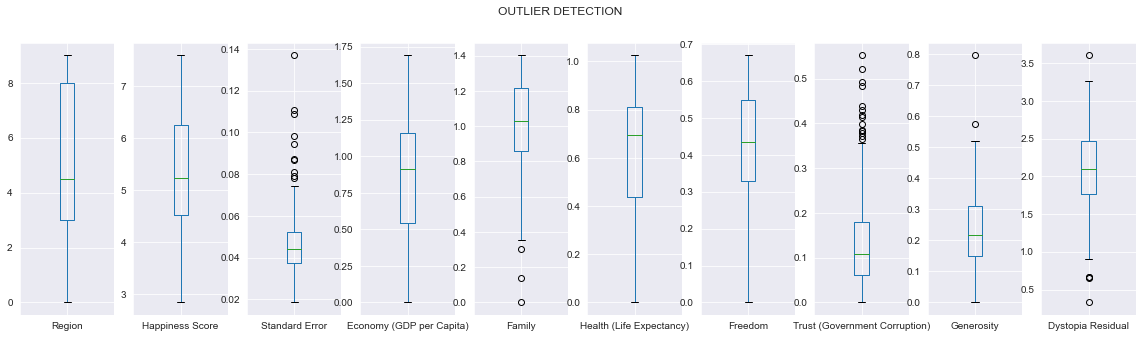

In [102]:
hs.plot(kind = 'box', subplots = True ,figsize = (20,5), layout = (1,10), title = "OUTLIER DETECTION" )
sns.set_style('darkgrid')
plt.show()

In [103]:
# Standard Error & Trust(Government Corruption) columns show presence of outliers

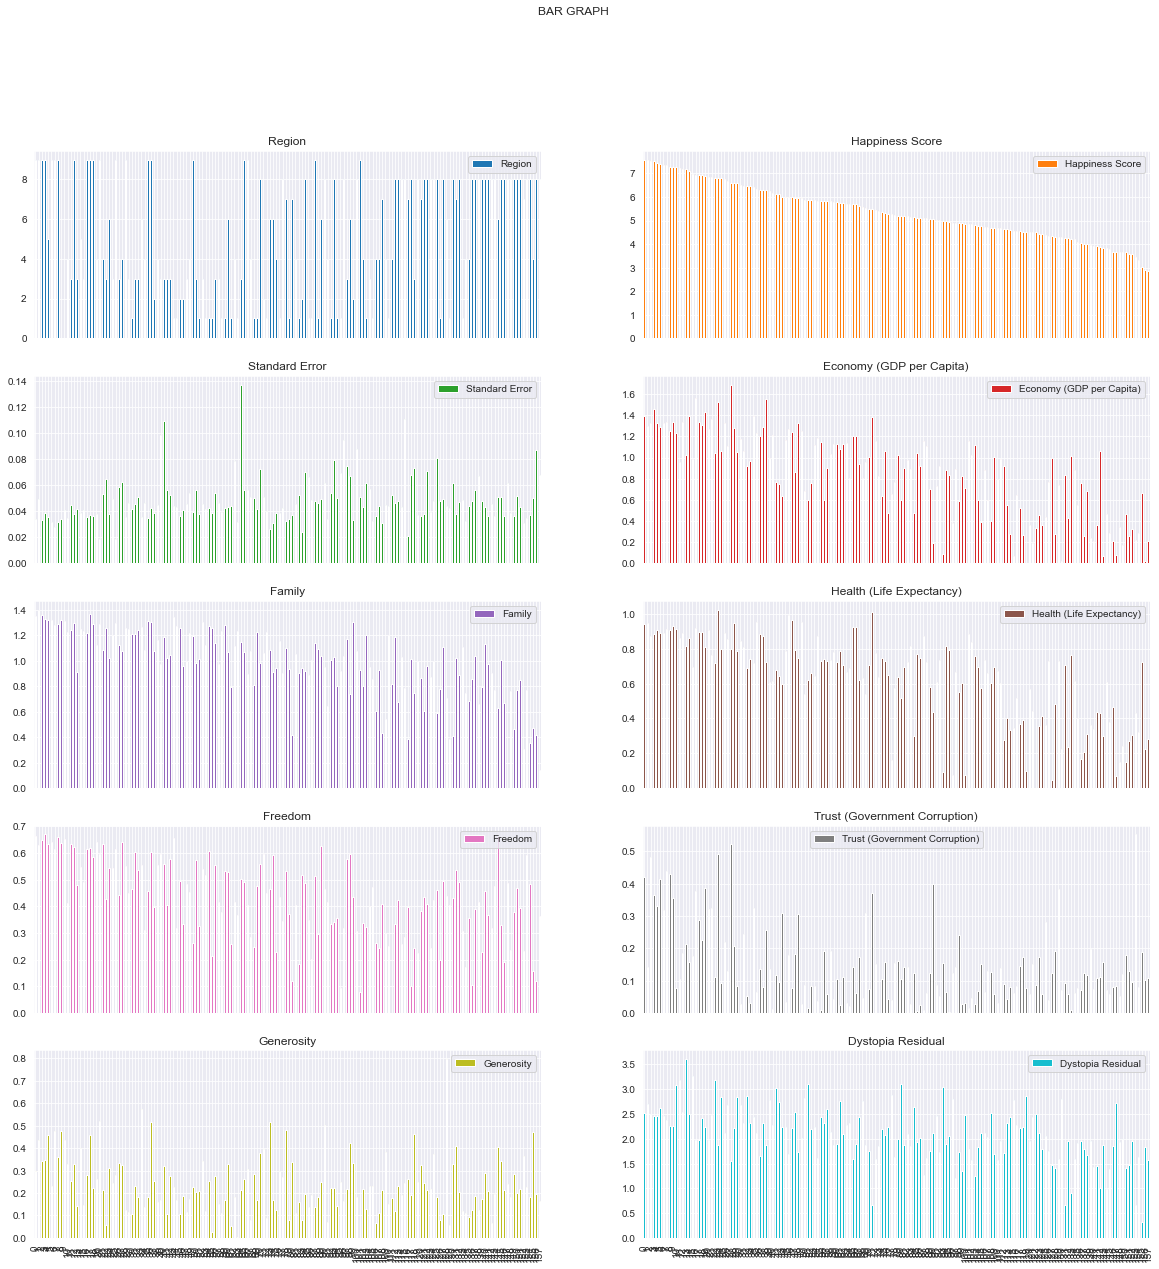

In [104]:
hs.plot(kind = 'bar', subplots = True ,figsize = (20,20), layout = (5,2), title = "BAR GRAPH" )
sns.set_style('darkgrid')
plt.show()

<Figure size 1440x2160 with 0 Axes>

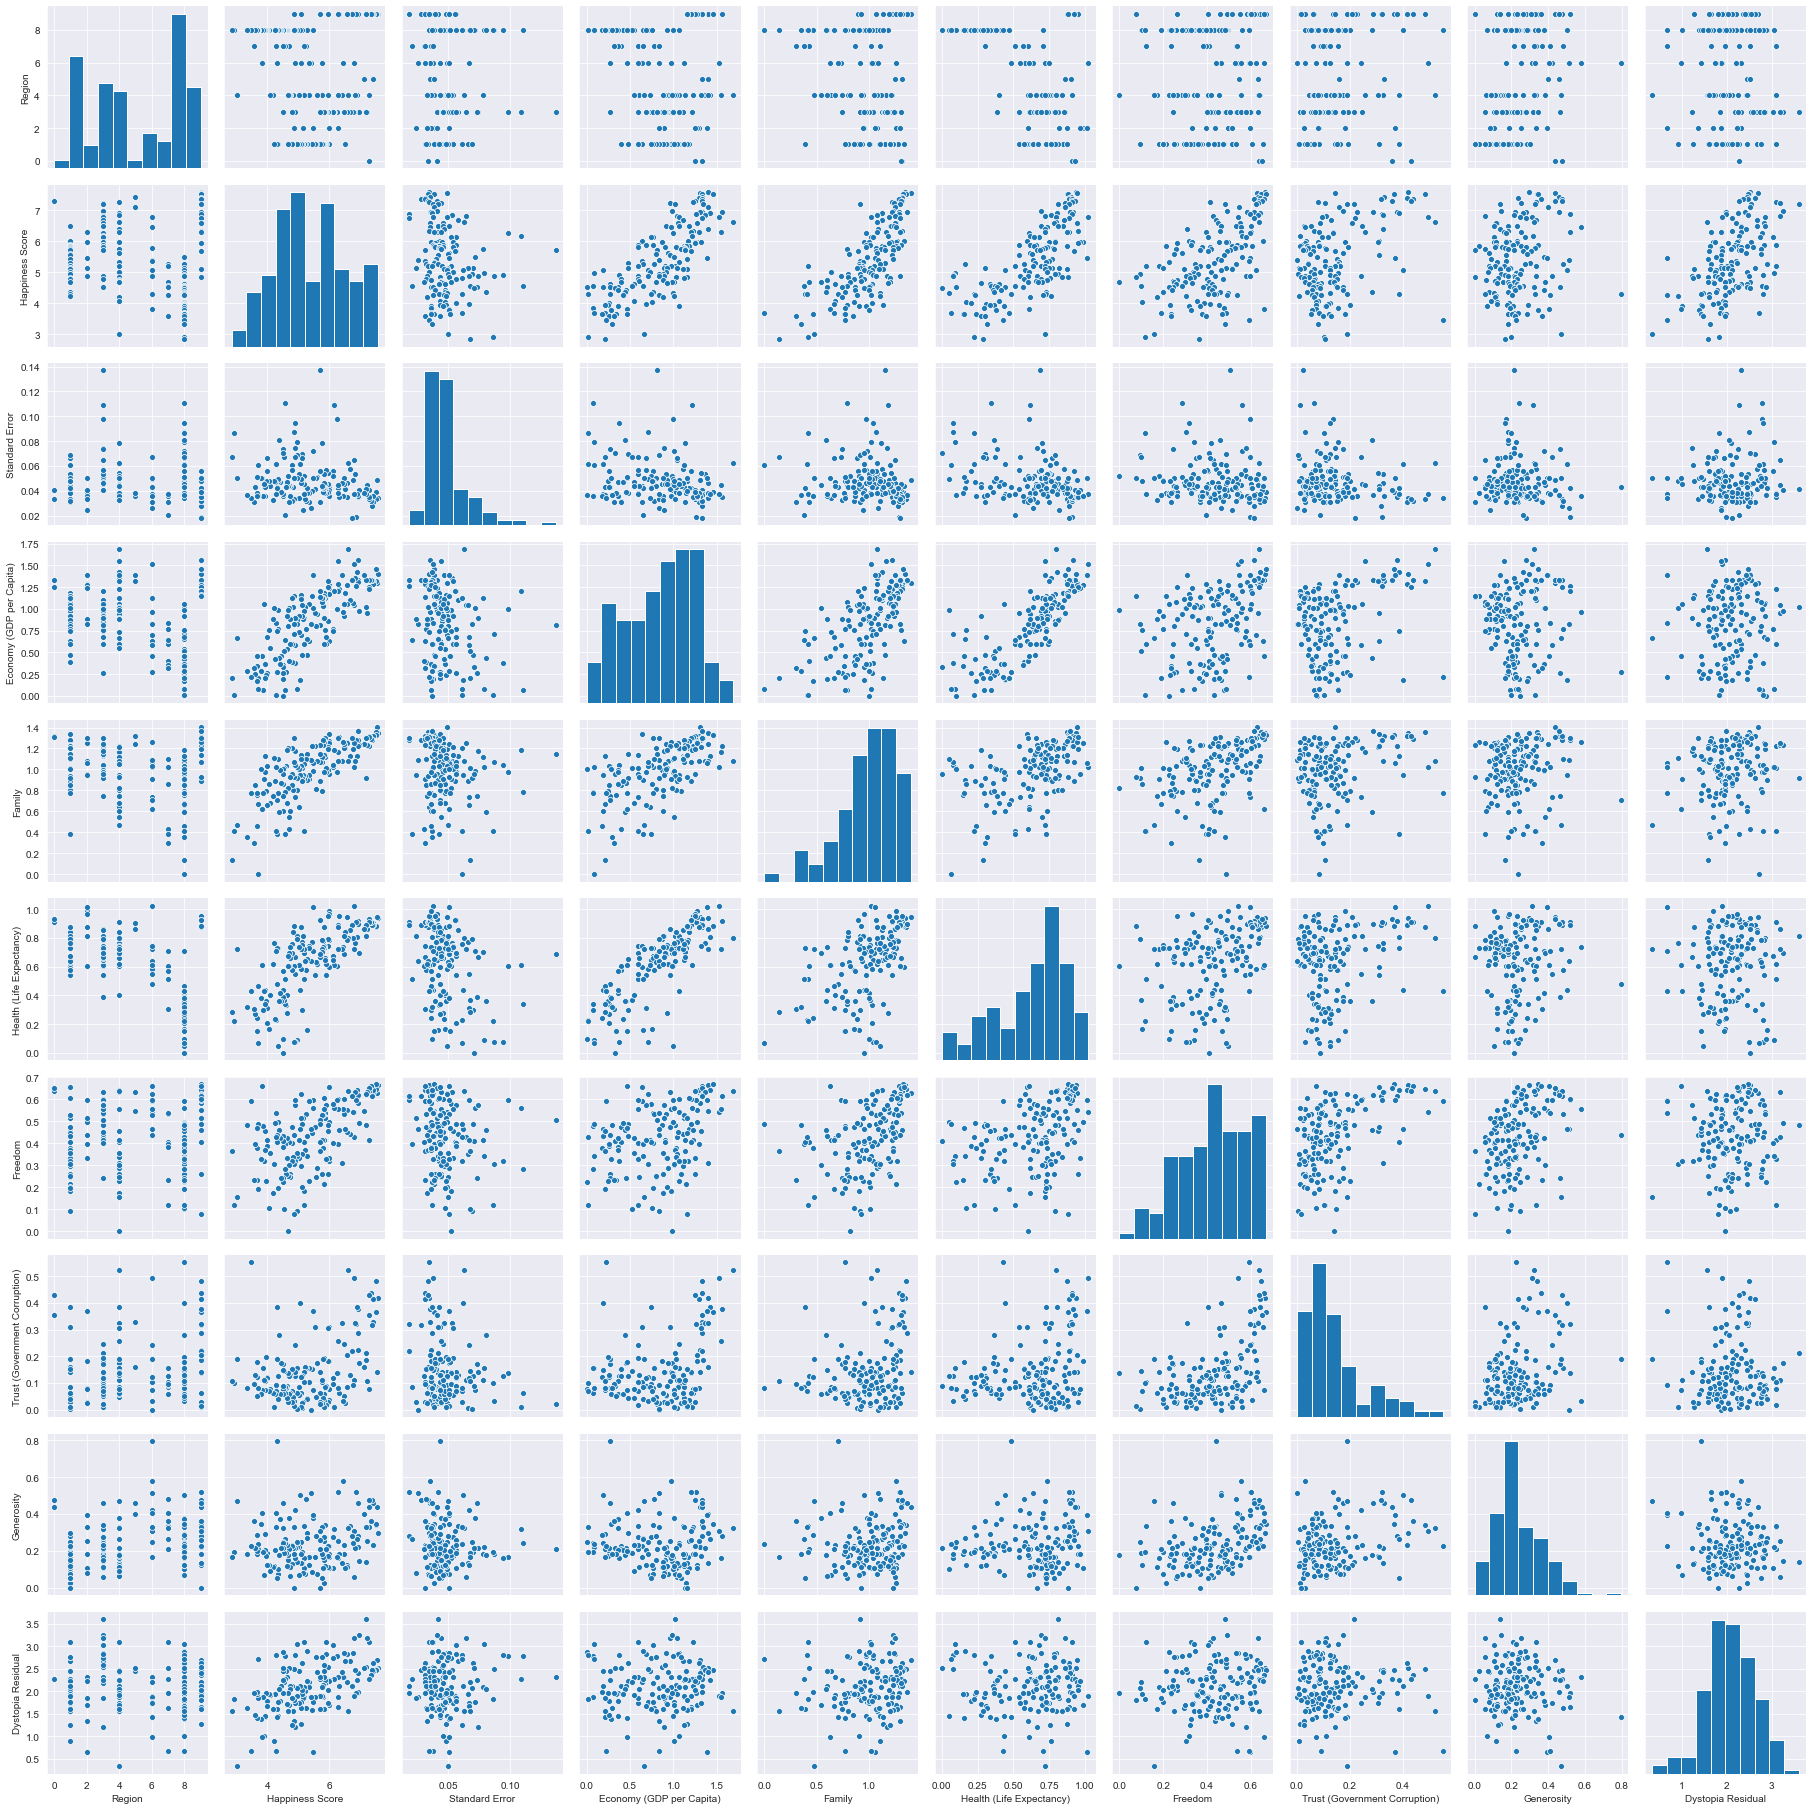

In [105]:
plt.figure(figsize=(20,30))
sns.pairplot(hs)
plt.show()

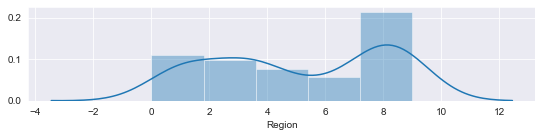

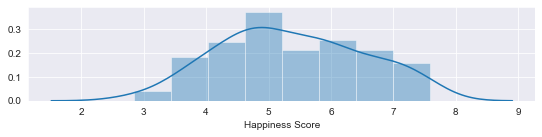

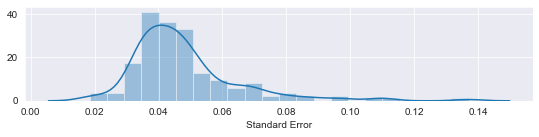

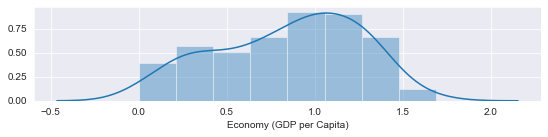

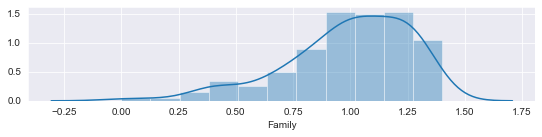

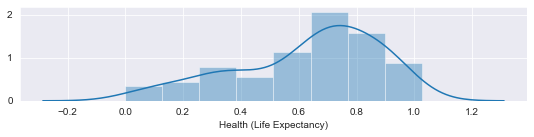

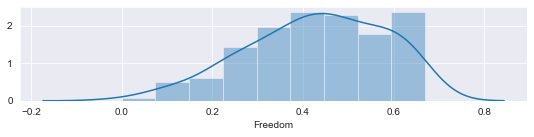

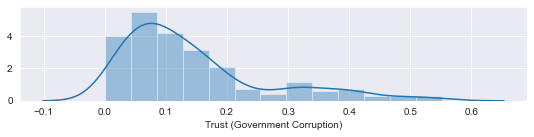

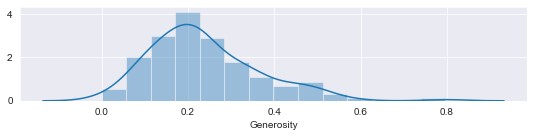

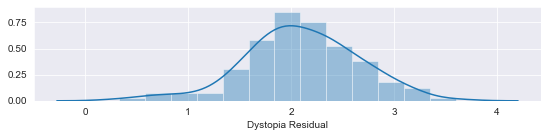

In [106]:
%matplotlib inline
collist = hs.columns.values
for i in range(0, len(collist)):
    plt.figure(figsize=(20,10))
    plt.subplot(5,2, i+1)
    sns.distplot(hs[collist[i]])

In [107]:
hs.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [111]:
hs_cor = hs.corr()
hs_cor

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


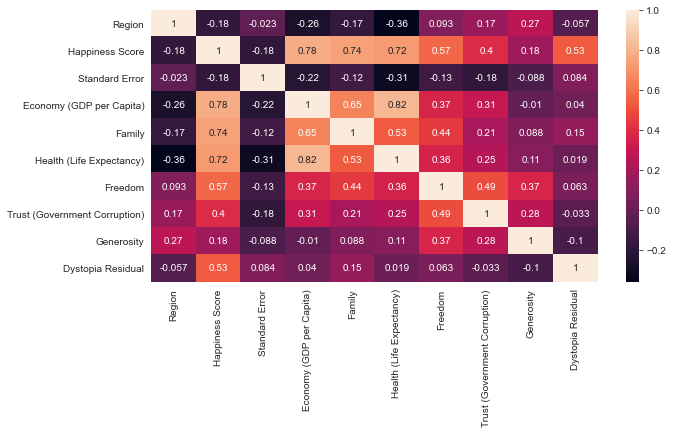

In [122]:
plt.figure(figsize = (10,5))
sns.heatmap(hs_cor, annot = True)
plt.show()

# Building the Regression Model

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [136]:
x = hs.drop(['Happiness Score'], axis =1)
y = pd.DataFrame(hs['Happiness Score'])

In [137]:
x.shape

(158, 9)

In [139]:
y.shape

(158, 1)

In [148]:
# Finding the optimum random state
best_r_state = 0
accu = 0
for i in range(30,201):
    x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.22, random_state = i)
    lnr = LinearRegression()
    lnr.fit(x_train,y_train)
    predlnr = lnr.predict(x_test)
    score = r2_score(y_test,predlnr)
    if score > accu:
        accu = score
        best_r_state = i

        
print(f'For best random state {best_r_state} r2_score is {accu *100}')

For best random state 72 r2_score is 99.99999664020943


In [155]:
# Finding best algorithm & checking for under & over fitting
import warnings
warnings.filterwarnings('ignore')
model = [LinearRegression(),Lasso(alpha = 0.0001),Ridge(alpha = 0.0001), ElasticNet(alpha = 0.0001), RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 72)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr Error is {mean_squared_error(y_test,pred)*100}')
    print(f'For algorithm {m} mean abs. error is {mean_absolute_error(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')

For algorithm LinearRegression() R2 Score is 99.99999664020943
For algorithm LinearRegression() mean Sqr Error is 6.39082097077366e-06
For algorithm LinearRegression() mean abs. error is 0.02140529974737555
For algorithm LinearRegression() cross validation score is 99.99916502586403
For algorithm Lasso(alpha=0.0001) R2 Score is 99.99988900394914
For algorithm Lasso(alpha=0.0001) mean Sqr Error is 0.00021113098447166886
For algorithm Lasso(alpha=0.0001) mean abs. error is 0.11346881710408699
For algorithm Lasso(alpha=0.0001) cross validation score is 99.98520881892283
For algorithm Ridge(alpha=0.0001) R2 Score is 99.99999666680952
For algorithm Ridge(alpha=0.0001) mean Sqr Error is 6.340223644876818e-06
For algorithm Ridge(alpha=0.0001) mean abs. error is 0.02122623354578833
For algorithm Ridge(alpha=0.0001) cross validation score is 99.99916576246915
For algorithm ElasticNet(alpha=0.0001) R2 Score is 99.99988945650901
For algorithm ElasticNet(alpha=0.0001) mean Sqr Error is 0.000210270

In [156]:
# Best Model identified is Ridge 
# Iddentifying best parameters for Ridge model using GridSearchCV

In [163]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.1,0.001,0.0001,1], 'fit_intercept' :[True,False], 'normalize' :[True, False], 'copy_X' :[True,False], 'max_iter':[1,10,100],
             'tol':[1e-3,1e-2], 'solver':['auto','svd','cholesky,lsqr','sparse_cg','sag','saga']}
clf = GridSearchCV(Ridge(),parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.0001,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 1,
 'normalize': True,
 'solver': 'auto',
 'tol': 0.001}

In [201]:
#Developing the model with identified best parameters
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 72)
rde = Ridge(alpha= 0.0001, copy_X= True,max_iter= 1)
rde.fit(x_train,y_train)
pred = rde.predict(x_test)
cv_score = cross_val_score(rde,x,y,cv= 10).mean()
print(f'R2 Score is {r2_score(y_test,pred)*100}')
print(f'Mean Sqr Error is {mean_squared_error(y_test,pred)}')
print(f'Mean abs. error is {mean_absolute_error(y_test,pred)}')
print(f'Cross validation score is {cv_score*100}')

R2 Score is 99.99999666680952
Mean Sqr Error is 6.340223644876818e-08
Mean abs. error is 0.00021226233545788327
Cross validation score is 99.99916576246915


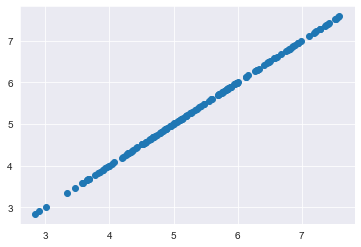

In [217]:
plt.scatter(rde.predict(x),y)
plt.title =("Predicted Vs Actual")
plt.show()

# Saving the best model

In [218]:
import joblib

In [219]:
joblib.dump(rde,'Project_m17_Happiness_Score.pkl')

['Project_m17_Happiness_Score.pkl']

In [220]:
joblib.load('Project_m17_Happiness_Score.pkl')

Ridge(alpha=0.0001, max_iter=1)